### STEP 1 Unzip 10K reports from data packages in a folder

In [1]:
# import os
# import shutil
# # The destination directory where you want to move the .txt files
# destination_dir = '/Users/chengyu/Documents/Corporate Finance/10K'

# # Making sure the destination directory exists, if not, create it
# if not os.path.exists(destination_dir):
#     os.makedirs(destination_dir)

# # List of base directories to search for .txt files
# # You can add or remove directories as needed
# base_dirs = ['/Users/chengyu/Documents/Corporate Finance/FR from Mcdonald/10-X_C_2011-2015',
#              '/Users/chengyu/Documents/Corporate Finance/FR from Mcdonald/10-X_C_2016-2020',
#              '/Users/chengyu/Documents/Corporate Finance/FR from Mcdonald/2021',
#              '/Users/chengyu/Documents/Corporate Finance/FR from Mcdonald/10-X_C_2022',
#              '/Users/chengyu/Documents/Corporate Finance/FR from Mcdonald/2023'
             
             
#              #'/Users/chengyu/Documents/Corporate Finance/FR from Mcdonald/10-X_C_2006-2010',
#              #'/Users/chengyu/Documents/Corporate Finance/FR from Mcdonald/10-X_C_2001-2005',
#              #'/Users/chengyu/Documents/Corporate Finance/FR from Mcdonald/10-X_C_1993-2000'
#     # Add more directories as needed
# ]

# # Go through each specified directory
# for base_dir in base_dirs:
#     # Walk through the directory
#     for subdir, dirs, files in os.walk(base_dir):
#         for file in files:
#             # Check if the file is a .txt file and does not contain "10Q" or "10-Q"
#             if file.endswith('.txt') and "10Q" not in file and "10-Q" not in file:
#                 # Construct the full file path
#                 file_path = os.path.join(subdir, file)
                
#                 # Construct the destination file path
#                 destination_file_path = os.path.join(destination_dir, file)
                
#                 # Check if the file already exists in the destination folder
#                 if os.path.exists(destination_file_path):
#                     print(f"File {file} already exists in the destination folder. Skipping.")
#                 else:
#                     # Move the file
#                     shutil.move(file_path, destination_file_path)
#                     print(f"Moved {file} to {destination_dir}")

# print("All .txt files without '10Q' and '10-Q' in the name have been moved to", destination_dir)


In [2]:
# #Run the above code for only half of the 10k reports, and rerun the rest part because laptops have limitations of reading from folders if they contain too much
# #now destination dir is 10k2, and the source dir is before 2010
# import os
# import shutil
# # The destination directory where you want to move the .txt files
# destination_dir = '/Users/chengyu/Documents/Corporate Finance/10K2'

# # Making sure the destination directory exists, if not, create it
# if not os.path.exists(destination_dir):
#     os.makedirs(destination_dir)

# # List of base directories to search for .txt files
# # You can add or remove directories as needed
# base_dirs = [
#              '/Users/chengyu/Documents/Corporate Finance/FR from Mcdonald/10-X_C_2006-2010',
#              '/Users/chengyu/Documents/Corporate Finance/FR from Mcdonald/10-X_C_2001-2005',
#              '/Users/chengyu/Documents/Corporate Finance/FR from Mcdonald/10-X_C_1993-2000'
#     # Add more directories as needed
# ]

# # Go through each specified directory
# for base_dir in base_dirs:
#     # Walk through the directory
#     for subdir, dirs, files in os.walk(base_dir):
#         for file in files:
#             # Check if the file is a .txt file and does not contain "10Q" or "10-Q"
#             if file.endswith('.txt') and "10Q" not in file and "10-Q" not in file:
#                 # Construct the full file path
#                 file_path = os.path.join(subdir, file)
                
#                 # Construct the destination file path
#                 destination_file_path = os.path.join(destination_dir, file)
                
#                 # Check if the file already exists in the destination folder
#                 if os.path.exists(destination_file_path):
#                     print(f"File {file} already exists in the destination folder. Skipping.")
#                 else:
#                     # Move the file
#                     shutil.move(file_path, destination_file_path)
#                     print(f"Moved {file} to {destination_dir}")

# print("All .txt files without '10Q' and '10-Q' in the name have been moved to", destination_dir)


### STEP2 Extract key sessions form the 10K texts (espcially 7 and 7A)

In [3]:
import pandas as pd
import os
import re

# define extract_info
def extract_info(text, pattern):
    match = re.search(pattern, text)
    return match.group(1).strip() if match else "Not found"

# define extract_section
def extract_section(text, start_heading, end_heading):
    l = len(text)
    start_idx = text.find(start_heading, int(l/5))
    end_idx = text.find(end_heading, start_idx + 1)
    if start_idx != -1 and end_idx != -1:
        return text[start_idx:end_idx].strip()
    else:
        return "Section not found."

# Innitialize the records
records = []

# Assign a directory
path = "/Users/chengyu/Documents/Corporate Finance/10K"  # change the directory if needed

# iterate the texts
for filename in os.listdir(path):
    if filename.endswith(".txt"):
        file_path = os.path.join(path, filename)
        with open(file_path, "r", encoding="utf-8") as file:
            content = file.read()
        
        # establish a dict
        record = {
            "ACCESSION NUMBER": extract_info(content, r"ACCESSION NUMBER:\s+([^\n]+)"),
            "CONFORMED SUBMISSION TYPE": extract_info(content, r"CONFORMED SUBMISSION TYPE:\s+([^\n]+)"),
            "CONFORMED PERIOD OF REPORT": extract_info(content, r"CONFORMED PERIOD OF REPORT:\s+([^\n]+)"),
            "FILED AS OF DATE": extract_info(content, r"FILED AS OF DATE:\s+([^\n]+)"),
            "DATE AS OF CHANGE": extract_info(content, r"DATE AS OF CHANGE:\s+([^\n]+)"),
            "COMPANY CONFORMED NAME": extract_info(content, r"COMPANY CONFORMED NAME:\s+([^\n]+)"),
            "CENTRAL INDEX KEY": extract_info(content, r"CENTRAL INDEX KEY:\s+([^\n]+)"),
            "FISCAL YEAR END": extract_info(content, r"FISCAL YEAR END:\s+([^\n]+)"),
            "Item 7 Content": extract_section(content, "Item 7", "Item 7A"),  
            "Item 7A Content": extract_section(content, "Item 7A", "Item 8")
        }
        
        # append records into the dict
        records.append(record)

# convert records into dataframe
df_records = pd.DataFrame(records)

# print first rows
print(df_records.head())

       ACCESSION NUMBER CONFORMED SUBMISSION TYPE CONFORMED PERIOD OF REPORT  \
0  0000005513-12-000006                      10-K                   20111231   
1  0001171843-17-001588                      10-K                   20161231   
2  0001477932-16-009787                      10-K                   20151231   
3  0001213900-20-028026                      10-K                   20200630   
4  0001144204-13-016260                      10-K                   20121231   

  FILED AS OF DATE DATE AS OF CHANGE        COMPANY CONFORMED NAME  \
0         20120224          20120224                    Unum Group   
1         20170317          20170316        HARVARD BIOSCIENCE INC   
2         20160414          20160414         Thunder Energies Corp   
3         20200923          20200923             SUNHYDROGEN, INC.   
4         20130320          20130320  MEDISAFE 1 TECHNOLOGIES CORP   

  CENTRAL INDEX KEY FISCAL YEAR END  \
0        0000005513            1231   
1        0001123494 

In [4]:
# define extract_info
def extract_info(text, pattern):
    match = re.search(pattern, text)
    return match.group(1).strip() if match else "Not found"

# define extract_section
def extract_section(text, start_heading, end_heading):
    l = len(text)
    start_idx = text.find(start_heading, int(l/5))
    end_idx = text.find(end_heading, start_idx + 1)
    if start_idx != -1 and end_idx != -1:
        return text[start_idx:end_idx].strip()
    else:
        return "Section not found."

# Innitialize the records
records = []

# Assign a directory
path = "/Users/chengyu/Documents/Corporate Finance/10K2"  # change the directory if needed

# iterate the texts
for filename in os.listdir(path):
    if filename.endswith(".txt"):
        file_path = os.path.join(path, filename)
        with open(file_path, "r", encoding="utf-8") as file:
            content = file.read()
        
        # establish a dict
        record = {
            "ACCESSION NUMBER": extract_info(content, r"ACCESSION NUMBER:\s+([^\n]+)"),
            "CONFORMED SUBMISSION TYPE": extract_info(content, r"CONFORMED SUBMISSION TYPE:\s+([^\n]+)"),
            "CONFORMED PERIOD OF REPORT": extract_info(content, r"CONFORMED PERIOD OF REPORT:\s+([^\n]+)"),
            "FILED AS OF DATE": extract_info(content, r"FILED AS OF DATE:\s+([^\n]+)"),
            "DATE AS OF CHANGE": extract_info(content, r"DATE AS OF CHANGE:\s+([^\n]+)"),
            "COMPANY CONFORMED NAME": extract_info(content, r"COMPANY CONFORMED NAME:\s+([^\n]+)"),
            "CENTRAL INDEX KEY": extract_info(content, r"CENTRAL INDEX KEY:\s+([^\n]+)"),
            "FISCAL YEAR END": extract_info(content, r"FISCAL YEAR END:\s+([^\n]+)"),
            "Item 7 Content": extract_section(content, "Item 7", "Item 7A"),  
            "Item 7A Content": extract_section(content, "Item 7A", "Item 8")
        }
        
        # append records into the dict
        records.append(record)

# convert records into dataframe
df_records2 = pd.DataFrame(records)

# print first rows
print(df_records2.head())

       ACCESSION NUMBER CONFORMED SUBMISSION TYPE CONFORMED PERIOD OF REPORT  \
0  0001193125-03-020751                    10-K/A                   20030331   
1  0000950124-06-001274                      10-K                   20051231   
2  0000914317-08-000946                      10-K                   20071231   
3  0001014897-04-000086                     10KSB                   20031231   
4  0001172635-05-000017                    10-K/A                   20050430   

  FILED AS OF DATE DATE AS OF CHANGE           COMPANY CONFORMED NAME  \
0         20030717         Not found              HILFIGER TOMMY CORP   
1         20060316          20060316      DURA AUTOMOTIVE SYSTEMS INC   
2         20080331          20080331  MERIDIAN INTERSTATE BANCORP INC   
3         20040521         Not found      SILVER BOW ANTIQUE AVIATION   
4         20050923          20050923   New Media Lottery Services Inc   

  CENTRAL INDEX KEY FISCAL YEAR END      Item 7 Content     Item 7A Content  
0 

In [5]:
df_records=pd.concat([df_records2,df_records],ignore_index=True)

In [6]:
df_records.head(10)

,ACCESSION NUMBER,CONFORMED SUBMISSION TYPE,CONFORMED PERIOD OF REPORT,FILED AS OF DATE,DATE AS OF CHANGE,COMPANY CONFORMED NAME,CENTRAL INDEX KEY,FISCAL YEAR END,Item 7 Content,Item 7A Content
0,0001193125-03-020751,10-K/A,20030331,20030717,Not found,HILFIGER TOMMY CORP,0000888747,0331,Section not found.,Section not found.
1,0000950124-06-001274,10-K,20051231,20060316,20060316,DURA AUTOMOTIVE SYSTEMS INC,0001016177,1231,Section not found.,Section not found.
2,0000914317-08-000946,10-K,20071231,20080331,20080331,MERIDIAN INTERSTATE BANCORP INC,0001411974,1231,Section not found.,Section not found.
3,0001014897-04-000086,10KSB,20031231,20040521,Not found,SILVER BOW ANTIQUE AVIATION,0001076891,1231,Section not found.,Section not found.
4,0001172635-05-000017,10-K/A,20050430,20050923,20050923,New Media Lottery Services Inc,0001172635,0430,Section not found.,Section not found.
5,0000950129-04-001984,10-K/A,20031231,20040408,Not found,NARA BANCORP INC,0001128361,1231,Item 7. \n MANAGEMENT S DISCUSSION AND ANALYSI...,Item 7A.\n\nWe do not anticipate that our curr...
6,0000950149-01-000370,10-K405,20001230,20010326,Not found,SAFEWAY INC,0000086144,1228,Section not found.,Section not found.
7,0000950152-09-004378,10-K/A,20081231,20090430,20090429,AKORN INC,0000003116,1231,Section not found.,Section not found.
8,0000950137-09-001176,10-K,20081231,20090219,20090219,DIGITAL RIVER INC /DE,0001062530,1231,Section not found.,"Item 7A of Part II, for information\n demonstr..."
9,0000899733-04-000032,10-K,20031227,20040311,Not found,WILD OATS MARKETS INC,0000909990,1231,Section not found.,Item 7A. \n\n QUANTITATIVE AND QUALITATIVE DIS...


In [7]:
df_records.head(500).to_csv('df_records.csv')

In [8]:
# some company files multiple 10-Ks in a year, so need to drop duplicates under the same company/same file year
# Assuming df_records is your DataFrame with the required data

# Step 1: Generate FILE YEAR based on FILED AS OF DATE by extracting the year
df_records['FILE YEAR'] = df_records['FILED AS OF DATE'].astype(str).str[:4]

# Step 2: Convert ACCESSION NUMBER to a comparable format by extracting the numeric part for comparison
df_records['ACCESSION NUMBER INT'] = df_records['ACCESSION NUMBER'].apply(lambda x: int(x.split('-')[-1]))

# Step 3: Sort by FILE YEAR, CENTRAL INDEX KEY, CONFORMED SUBMISSION TYPE, and ACCESSION NUMBER INT (for comparison)
df_records_sorted = df_records.sort_values(by=['FILE YEAR', 'CENTRAL INDEX KEY', 'CONFORMED SUBMISSION TYPE', 'ACCESSION NUMBER INT'], ascending=[True, True, True, False])

# Step 4: Remove duplicates based on FILE YEAR, CENTRAL INDEX KEY, and CONFORMED SUBMISSION TYPE, keeping the first occurrence
df_records_unique = df_records_sorted.drop_duplicates(subset=['FILE YEAR', 'CENTRAL INDEX KEY', 'CONFORMED SUBMISSION TYPE'], keep='first')

# Optional: Remove the auxiliary 'ACCESSION NUMBER INT' column if no longer needed
df_records_unique = df_records_unique.drop(columns=['ACCESSION NUMBER INT'])

# Reset index if necessary
df_records_unique.reset_index(drop=True, inplace=True)

# df_records_unique now holds the processed DataFrame


In [9]:
#quick view over the data
df_records_unique[df_records_unique['FILED AS OF DATE'].astype(float)>20230000].head(10)

,ACCESSION NUMBER,CONFORMED SUBMISSION TYPE,CONFORMED PERIOD OF REPORT,FILED AS OF DATE,DATE AS OF CHANGE,COMPANY CONFORMED NAME,CENTRAL INDEX KEY,FISCAL YEAR END,Item 7 Content,Item 7A Content,FILE YEAR
248076,0001104659-23-082069,10-K,20230531,20230718,20230718,AAR CORP,0000001750,0531,Section not found.,Section not found.,2023
248077,0001628280-23-004026,10-K,20221231,20230217,20230217,ABBOTT LABORATORIES,0000001800,1231,"Item 7, Management s Discussion and Analysis o...","Item 7A, Quantitative and Qualitative Disclosu...",2023
248078,0001264931-23-000006,10-K,20221231,20230331,20230331,WORLDS INC,0000001961,1231,Section not found.,Section not found.,2023
248079,0001564590-23-003422,10-K,20221231,20230310,20230310,ACME UNITED CORP,0000002098,1231,Item 7. Management s Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,2023
248080,0000002178-23-000038,10-K,20221231,20230316,20230316,"ADAMS RESOURCES & ENERGY, INC.",0000002178,1231,Item 7. Management s Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,2023
248081,0001654954-23-003055,10-K,20221231,20230316,20230316,BK Technologies Corp,0000002186,1231,Item 7. Management s Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,2023
248082,0001654954-23-005616,10-K/A,20221231,20230502,20230502,BK Technologies Corp,0000002186,1231,Section not found.,Section not found.,2023
248083,0000002488-23-000047,10-K,20221231,20230227,20230227,ADVANCED MICRO DEVICES INC,0000002488,1230,Section not found.,Section not found.,2023
248084,0000002969-23-000047,10-K,20230930,20231116,20231116,"Air Products & Chemicals, Inc.",0000002969,0930,Item 7. Management's Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,2023
248085,0000950170-23-006169,10-K,20221231,20230306,20230306,CECO ENVIRONMENTAL CORP,0000003197,1231,Section not found.,Section not found.,2023


### STEP3 Intro of Loughran-McD dictionary and prepare TF-IDF, Bag of words method and so on

In [10]:
import pandas as pd
raw_url_dict = 'https://raw.githubusercontent.com/ethancn01/10ksentimentalanalysis/main/Loughran-McDonald_MasterDictionary_1993-2021.csv'
dict = pd.read_csv(raw_url_dict)

In [11]:
#quick view of the dict
columns_to_update = ['Negative', 'Positive', 'Uncertainty', 'Litigious', 'Strong_Modal', 'Weak_Modal', 'Constraining']

for column in columns_to_update:
    dict[column] = dict[column].apply(lambda x: 1 if x != 0 else 0)
dict

,Word,Seq_num,Word Count,Word Proportion,Average Proportion,Std Dev,Doc Count,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining,Syllables,Source
0,AARDVARK,1,354,1.550080e-08,1.422600e-08,3.815486e-06,99,0,0,0,0,0,0,0,2,12of12inf
1,AARDVARKS,2,3,1.313627e-10,8.653817e-12,9.241714e-09,1,0,0,0,0,0,0,0,2,12of12inf
2,ABACI,3,9,3.940882e-10,1.169679e-10,5.290465e-08,7,0,0,0,0,0,0,0,3,12of12inf
3,ABACK,4,29,1.269840e-09,6.654735e-10,1.595100e-07,28,0,0,0,0,0,0,0,2,12of12inf
4,ABACUS,5,8570,3.752595e-07,3.809464e-07,3.529356e-05,1108,0,0,0,0,0,0,0,3,12of12inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86526,ZYGOTE,86529,50,2.189379e-09,8.729336e-10,1.886011e-07,35,0,0,0,0,0,0,0,2,12of12inf
86527,ZYGOTES,86530,1,4.378757e-11,1.809516e-11,1.932446e-08,1,0,0,0,0,0,0,0,2,12of12inf
86528,ZYGOTIC,86531,0,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,3,12of12inf
86529,ZYMURGIES,86532,0,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,3,12of12inf


#### A. Bag of Words

In [12]:
#Data Preparation for BoW

df_analysis = df_records_unique.copy()


In [13]:
! pip install dask[complete]  # Install Dask with complete dependencies

zsh:1: no matches found: dask[complete]


In [14]:
import pandas as pd
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
import re
from collections import Counter


In [15]:
df_analysis


,ACCESSION NUMBER,CONFORMED SUBMISSION TYPE,CONFORMED PERIOD OF REPORT,FILED AS OF DATE,DATE AS OF CHANGE,COMPANY CONFORMED NAME,CENTRAL INDEX KEY,FISCAL YEAR END,Item 7 Content,Item 7A Content,FILE YEAR
0,0000893220-00-000394,10-K405,20000101,20000330,Not found,K TRON INTERNATIONAL INC,0000000020,0102,Section not found.,Section not found.,2000
1,0000912057-00-039006,10-K405,20000531,20000824,Not found,AAR CORP,0000001750,0531,Section not found.,Section not found.,2000
2,0000912057-00-011377,10-K405,19991231,20000314,Not found,ABBOTT LABORATORIES,0000001800,1231,Section not found.,Section not found.,2000
3,0001107049-00-500053,10-K405,20000430,20000727,Not found,ABRAMS INDUSTRIES INC,0000001923,0430,Section not found.,Section not found.,2000
4,0000001952-00-000002,10-K,19991231,20000330,Not found,IREX CORP,0000001952,1231,Section not found.,Section not found.,2000
...,...,...,...,...,...,...,...,...,...,...,...
255938,0001967649-23-000025,10-K,20230929,20231221,20231221,Vestis Corp,0001967649,0930,Item 7. Management's Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,2023
255939,0001974793-23-000008,10-K,20230930,20231220,20231219,"Oaktree Gardens OLP, LLC",0001974793,1231,Item 7. Management's Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,2023
255940,0001213900-23-097443,10-K,20230930,20231221,20231220,Bloom HoldCo LLC,0001975931,Not found,Section not found.,Section not found.,2023
255941,0001493152-23-046325,10-K,20230930,20231228,20231228,DFP HOLDINGS Ltd,0001976900,0930,Section not found.,Section not found.,2023


In [16]:
import dask.dataframe as dd
import pandas as pd
from dask.diagnostics import ProgressBar


# convert dict into 
dict['Word'] = dict['Word'].str.lower()
sentiment_dict = dict.set_index('Word')[['Negative', 'Positive', 'Uncertainty', 'Litigious', 'Strong_Modal', 'Weak_Modal', 'Constraining']].to_dict('index')

# Use Dask Dataframe to calculate the sentiment result, so we can carry on the analysis with multiple CPU cores simultaneously
ddf_analysis = dd.from_pandas(df_analysis, npartitions=8)

# define sentiment analysis function
def sentiment_analysis(row):
    # first we conmbine item 7 and 7A
    combined_text = (row['Item 7 Content'] + " " + row['Item 7A Content']).lower()
    words = combined_text.split()
    
    # intialize the sentiment counts
    sentiment_counts = {'Negative': 0, 'Positive': 0, 'Uncertainty': 0, 'Litigious': 0, 'Strong_Modal': 0, 'Weak_Modal': 0, 'Constraining': 0}
    
    # count the frequency
    for word in words:
        if word in sentiment_dict:
            for sentiment in sentiment_counts.keys():
                sentiment_counts[sentiment] += sentiment_dict[word].get(sentiment, 0)
                
    return pd.Series(sentiment_counts)

# map the scores into different sentiment columns
meta = {sentiment: 'int' for sentiment in ['Negative', 'Positive', 'Uncertainty', 'Litigious', 'Strong_Modal', 'Weak_Modal', 'Constraining']}
sentiment_columns = ddf_analysis.map_partitions(lambda df: df.apply(sentiment_analysis, axis=1), meta=meta)

# display the progress while running
with ProgressBar():
    computed_sentiments = sentiment_columns.compute()

# convert the result into a dataframe
df_final = df_analysis.join(computed_sentiments)

# display the result
print(df_final.head())



[########################################] | 100% Completed | 452.25 s
       ACCESSION NUMBER CONFORMED SUBMISSION TYPE CONFORMED PERIOD OF REPORT  \
0  0000893220-00-000394                   10-K405                   20000101   
1  0000912057-00-039006                   10-K405                   20000531   
2  0000912057-00-011377                   10-K405                   19991231   
3  0001107049-00-500053                   10-K405                   20000430   
4  0000001952-00-000002                      10-K                   19991231   

  FILED AS OF DATE DATE AS OF CHANGE    COMPANY CONFORMED NAME  \
0         20000330         Not found  K TRON INTERNATIONAL INC   
1         20000824         Not found                  AAR CORP   
2         20000314         Not found       ABBOTT LABORATORIES   
3         20000727         Not found     ABRAMS INDUSTRIES INC   
4         20000330         Not found                 IREX CORP   

  CENTRAL INDEX KEY FISCAL YEAR END      Item 7 Con

In [17]:
df_final

,ACCESSION NUMBER,CONFORMED SUBMISSION TYPE,CONFORMED PERIOD OF REPORT,FILED AS OF DATE,DATE AS OF CHANGE,COMPANY CONFORMED NAME,CENTRAL INDEX KEY,FISCAL YEAR END,Item 7 Content,Item 7A Content,FILE YEAR,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining
0,0000893220-00-000394,10-K405,20000101,20000330,Not found,K TRON INTERNATIONAL INC,0000000020,0102,Section not found.,Section not found.,2000,0,0,0,0,0,0,0
1,0000912057-00-039006,10-K405,20000531,20000824,Not found,AAR CORP,0000001750,0531,Section not found.,Section not found.,2000,0,0,0,0,0,0,0
2,0000912057-00-011377,10-K405,19991231,20000314,Not found,ABBOTT LABORATORIES,0000001800,1231,Section not found.,Section not found.,2000,0,0,0,0,0,0,0
3,0001107049-00-500053,10-K405,20000430,20000727,Not found,ABRAMS INDUSTRIES INC,0000001923,0430,Section not found.,Section not found.,2000,0,0,0,0,0,0,0
4,0000001952-00-000002,10-K,19991231,20000330,Not found,IREX CORP,0000001952,1231,Section not found.,Section not found.,2000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255938,0001967649-23-000025,10-K,20230929,20231221,20231221,Vestis Corp,0001967649,0930,Item 7. Management's Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,2023,84,34,102,41,15,20,50
255939,0001974793-23-000008,10-K,20230930,20231220,20231219,"Oaktree Gardens OLP, LLC",0001974793,1231,Item 7. Management's Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,2023,41,32,99,16,20,52,35
255940,0001213900-23-097443,10-K,20230930,20231221,20231220,Bloom HoldCo LLC,0001975931,Not found,Section not found.,Section not found.,2023,0,0,0,0,0,0,0
255941,0001493152-23-046325,10-K,20230930,20231228,20231228,DFP HOLDINGS Ltd,0001976900,0930,Section not found.,Section not found.,2023,0,0,0,0,0,0,0


In [18]:
dict.describe()

,Seq_num,Word Count,Word Proportion,Average Proportion,Std Dev,Doc Count,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining,Syllables
count,86531.000000,8.653100e+04,8.653100e+04,8.653100e+04,8.653100e+04,8.653100e+04,86531.000000,86531.000000,86531.000000,86531.000000,86531.000000,86531.000000,86531.000000,86531.000000
mean,43267.739007,2.639231e+05,1.155655e-05,1.155585e-05,1.861893e-05,2.104477e+04,0.027216,0.004091,0.003432,0.010459,0.000220,0.000312,0.002126,2.841386
std,24980.758485,8.477175e+06,3.711949e-04,3.736677e-04,1.248076e-04,1.037376e+05,0.162712,0.063830,0.058486,0.101732,0.014817,0.017662,0.046064,1.225919
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21633.500000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,43269.000000,7.700000e+01,3.371643e-09,2.812529e-09,6.047555e-07,4.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,64901.500000,2.291000e+03,1.003173e-07,8.389999e-08,5.536453e-06,9.930000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,86534.000000,1.586171e+09,6.945457e-02,6.984255e-02,1.118392e-02,1.140097e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


In [19]:
df_final.to_csv('df_final.csv')

####
 Now Size down the result by filtering out redundant companies (that are not SNP 500)

In [20]:
cikmapping = 'https://github.com/ethancn01/10ksentimentalanalysis/raw/main/SP500_matching_table.csv'
cikmapping = pd.read_csv(cikmapping)
cikmapping['CIKS'] = cikmapping['CIKS'].astype(str).str.zfill(10)


In [21]:
df_final

,ACCESSION NUMBER,CONFORMED SUBMISSION TYPE,CONFORMED PERIOD OF REPORT,FILED AS OF DATE,DATE AS OF CHANGE,COMPANY CONFORMED NAME,CENTRAL INDEX KEY,FISCAL YEAR END,Item 7 Content,Item 7A Content,FILE YEAR,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining
0,0000893220-00-000394,10-K405,20000101,20000330,Not found,K TRON INTERNATIONAL INC,0000000020,0102,Section not found.,Section not found.,2000,0,0,0,0,0,0,0
1,0000912057-00-039006,10-K405,20000531,20000824,Not found,AAR CORP,0000001750,0531,Section not found.,Section not found.,2000,0,0,0,0,0,0,0
2,0000912057-00-011377,10-K405,19991231,20000314,Not found,ABBOTT LABORATORIES,0000001800,1231,Section not found.,Section not found.,2000,0,0,0,0,0,0,0
3,0001107049-00-500053,10-K405,20000430,20000727,Not found,ABRAMS INDUSTRIES INC,0000001923,0430,Section not found.,Section not found.,2000,0,0,0,0,0,0,0
4,0000001952-00-000002,10-K,19991231,20000330,Not found,IREX CORP,0000001952,1231,Section not found.,Section not found.,2000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255938,0001967649-23-000025,10-K,20230929,20231221,20231221,Vestis Corp,0001967649,0930,Item 7. Management's Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,2023,84,34,102,41,15,20,50
255939,0001974793-23-000008,10-K,20230930,20231220,20231219,"Oaktree Gardens OLP, LLC",0001974793,1231,Item 7. Management's Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,2023,41,32,99,16,20,52,35
255940,0001213900-23-097443,10-K,20230930,20231221,20231220,Bloom HoldCo LLC,0001975931,Not found,Section not found.,Section not found.,2023,0,0,0,0,0,0,0
255941,0001493152-23-046325,10-K,20230930,20231228,20231228,DFP HOLDINGS Ltd,0001976900,0930,Section not found.,Section not found.,2023,0,0,0,0,0,0,0


In [22]:
df_10ksp=df_final.copy()
df_10ksp=df_10ksp[df_10ksp['CENTRAL INDEX KEY'].isin(cikmapping['CIKS'])].reset_index()

In [23]:
#filter the redundant samples which do not have item 7 nor item 7A
df_10ksp_filtered1 = df_10ksp[
    ~((df_10ksp['Item 7 Content'] == 'Section not found.') & 
      (df_10ksp['Item 7A Content'] == 'Section not found.'))
].reset_index()


In [24]:
df_10ksp_filtered1

,level_0,index,ACCESSION NUMBER,CONFORMED SUBMISSION TYPE,CONFORMED PERIOD OF REPORT,FILED AS OF DATE,DATE AS OF CHANGE,COMPANY CONFORMED NAME,CENTRAL INDEX KEY,FISCAL YEAR END,Item 7 Content,Item 7A Content,FILE YEAR,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining
0,5,58,0000004281-00-000007,10-K405,19991231,20000228,Not found,ALCOA INC,0000004281,1231,Item 7. Management's Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,2000,0,0,1,2,0,0,0
1,7,72,0000004904-00-000039,10-K405,19991231,20000324,Not found,AMERICAN ELECTRIC POWER COMPANY INC,0000004904,1231,Item 7. MANAGEMENT'S DISCUSSION AND ANALYSIS O...,Item 7A. QUANTITATIVE AND QUALITATIVE DISCLOSU...,2000,3,0,1,14,0,0,14
2,14,121,0000007084-00-000039,10-K,20000630,20000928,Not found,ARCHER DANIELS MIDLAND CO,0000007084,0630,Item 7. MANAGEMENT'S DISCUSSION AND ANALYSIS O...,Item 7A.QUANTITIVE AND QUALITATIVE DISCLOSURES...,2000,0,0,1,2,0,0,0
3,43,500,0000914317-00-000307,10-K,20000128,20000427,Not found,DOLLAR GENERAL CORP,0000029534,0131,Section not found.,Item 7A -\nQuantitative and Qualitative Disclo...,2000,20,15,45,13,11,6,11
4,45,509,0000950123-00-002335,10-K,19991231,20000316,Not found,DOVER CORP,0000029905,1231,Item 7. MANAGEMENT'S DISCUSSION AND ANALYSIS O...,Item 7A. QUANTITATIVE AND QUALITATIVE DISCLOSU...,2000,0,0,6,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5018,11009,253806,0000950170-23-064855,10-K,20230930,20231117,20231117,WestRock Co,0001732845,0930,Item 7. Management s Discussion and Analysis o...,Item 7A.\t QUANTITATIVE AND QUALITAT IVE DISCL...,2023,98,41,172,59,18,58,91
5019,11010,253854,0001739940-23-000008,10-K,20221231,20230223,20230223,Cigna Group,0001739940,1231,Item 7 of this Form 10-K for additional inform...,Item 7A. QUANTITATIVE AND QUALITATIVE DISCLOSU...,2023,311,116,304,196,35,134,108
5020,11013,253910,0001748790-23-000030,10-K,20230630,20230817,20230817,Amcor plc,0001748790,0630,Item 7. - Management's Discussion and Analysis...,Item 7A. - Quantitative and Qualitative Disclo...,2023,139,39,129,45,13,36,69
5021,11018,254162,0001781335-23-000009,10-K,20221231,20230203,20230203,Otis Worldwide Corp,0001781335,1231,"Item 7 and ""Note 2: Significant Accounting Pol...",Item 7A. Quantitative and Qualitative Disclosu...,2023,171,83,166,164,13,83,76


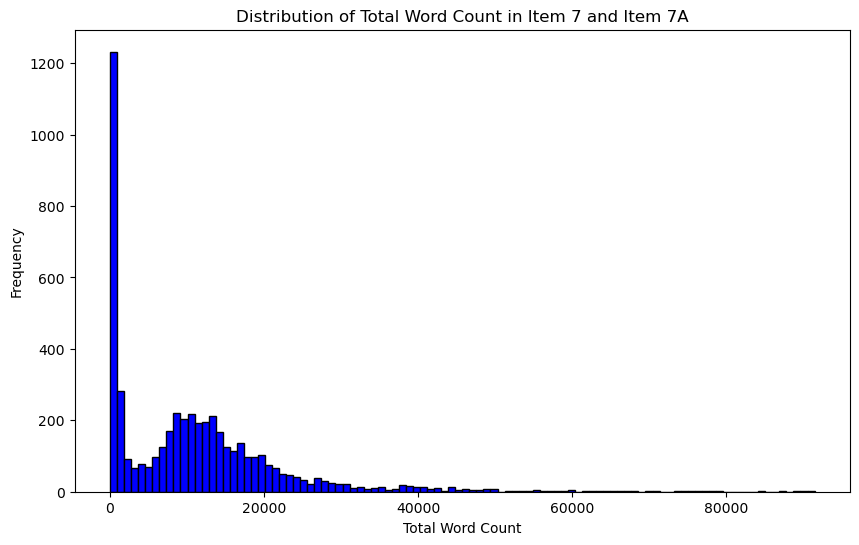

In [25]:
# Further filter out the samples without enough content. To be able to that, create a column to count the words number of item7 and item 7A
df_10ksp_filtered2=df_10ksp_filtered1.copy()
df_10ksp_filtered2['Item 7 Word Count'] = df_10ksp_filtered2['Item 7 Content'].apply(lambda x: len(x.split()))
df_10ksp_filtered2['Item 7A Word Count'] = df_10ksp_filtered2['Item 7A Content'].apply(lambda x: len(x.split()))
df_10ksp_filtered2['Total Word Count'] = df_10ksp_filtered2['Item 7 Word Count'] + df_10ksp_filtered2['Item 7A Word Count']
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df_10ksp_filtered2['Total Word Count'], bins=100, color='blue', edgecolor='black')
plt.title('Distribution of Total Word Count in Item 7 and Item 7A')
plt.xlabel('Total Word Count')
plt.ylabel('Frequency')
plt.show()

In [26]:
top_30_rows_by_word_count = df_10ksp_filtered2.sort_values(by='Total Word Count', ascending=False).head(30)

In [27]:
item_8_df = df_10ksp_filtered1[df_10ksp_filtered1['Item 7 Content'].str.contains('Item 8', case=False) | 
                                df_10ksp_filtered1['Item 7 Content'].str.contains('ITEM 8', case=False) |
                                df_10ksp_filtered1['Item 7 Content'].str.contains('item 8', case=False) |
                                df_10ksp_filtered1['Item 7A Content'].str.contains('Item 8', case=False) |
                                df_10ksp_filtered1['Item 7A Content'].str.contains('ITEM 8', case=False) |
                                df_10ksp_filtered1['Item 7A Content'].str.contains('item 8', case=False)]

item_8_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1722 entries, 3 to 5022
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   level_0                     1722 non-null   int64 
 1   index                       1722 non-null   int64 
 2   ACCESSION NUMBER            1722 non-null   object
 3   CONFORMED SUBMISSION TYPE   1722 non-null   object
 4   CONFORMED PERIOD OF REPORT  1722 non-null   object
 5   FILED AS OF DATE            1722 non-null   object
 6   DATE AS OF CHANGE           1722 non-null   object
 7   COMPANY CONFORMED NAME      1722 non-null   object
 8   CENTRAL INDEX KEY           1722 non-null   object
 9   FISCAL YEAR END             1722 non-null   object
 10  Item 7 Content              1722 non-null   object
 11  Item 7A Content             1722 non-null   object
 12  FILE YEAR                   1722 non-null   object
 13  Negative                    1722 non-null   int64 
 1

In [28]:
#above codes show that there are 1722 samples that include content after item 8, we should delete them
import re

for col in ['Item 7 Content', 'Item 7A Content']:
    df_10ksp_filtered1[col] = df_10ksp_filtered1[col].apply(lambda x: re.sub(r'(?i)Item 8.*', '', x))

# Displaying the updated DataFrame
print(df_10ksp_filtered1)



      level_0   index      ACCESSION NUMBER CONFORMED SUBMISSION TYPE  \
0           5      58  0000004281-00-000007                   10-K405   
1           7      72  0000004904-00-000039                   10-K405   
2          14     121  0000007084-00-000039                      10-K   
3          43     500  0000914317-00-000307                      10-K   
4          45     509  0000950123-00-002335                      10-K   
...       ...     ...                   ...                       ...   
5018    11009  253806  0000950170-23-064855                      10-K   
5019    11010  253854  0001739940-23-000008                      10-K   
5020    11013  253910  0001748790-23-000030                      10-K   
5021    11018  254162  0001781335-23-000009                      10-K   
5022    11022  254997  0001784031-23-000007                      10-K   

     CONFORMED PERIOD OF REPORT FILED AS OF DATE DATE AS OF CHANGE  \
0                      19991231         20000228     

In [29]:
#now retest the dataframe
item_8_df = df_10ksp_filtered1[df_10ksp_filtered1['Item 7 Content'].str.contains('Item 8', case=False) | 
                                df_10ksp_filtered1['Item 7 Content'].str.contains('ITEM 8', case=False) |
                                df_10ksp_filtered1['Item 7 Content'].str.contains('item 8', case=False) |
                                df_10ksp_filtered1['Item 7A Content'].str.contains('Item 8', case=False) |
                                df_10ksp_filtered1['Item 7A Content'].str.contains('ITEM 8', case=False) |
                                df_10ksp_filtered1['Item 7A Content'].str.contains('item 8', case=False)]

item_8_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   level_0                     0 non-null      int64 
 1   index                       0 non-null      int64 
 2   ACCESSION NUMBER            0 non-null      object
 3   CONFORMED SUBMISSION TYPE   0 non-null      object
 4   CONFORMED PERIOD OF REPORT  0 non-null      object
 5   FILED AS OF DATE            0 non-null      object
 6   DATE AS OF CHANGE           0 non-null      object
 7   COMPANY CONFORMED NAME      0 non-null      object
 8   CENTRAL INDEX KEY           0 non-null      object
 9   FISCAL YEAR END             0 non-null      object
 10  Item 7 Content              0 non-null      object
 11  Item 7A Content             0 non-null      object
 12  FILE YEAR                   0 non-null      object
 13  Negative                    0 non-null      int64 
 14  Positive   

In [30]:
#Now item 8 is cleaned, we can clean item 7A from column 7
item_7a_df = df_10ksp_filtered1[df_10ksp_filtered1['Item 7 Content'].str.contains('Item 7A', case=False) | 
                               df_10ksp_filtered1['Item 7 Content'].str.contains('Item 7a', case=False) | 
                                df_10ksp_filtered1['Item 7 Content'].str.contains('ITEM 7A', case=False) |
                                df_10ksp_filtered1['Item 7 Content'].str.contains('ITEM 7a', case=False) |
                                df_10ksp_filtered1['Item 7 Content'].str.contains('item 7A', case=False) |
                                df_10ksp_filtered1['Item 7 Content'].str.contains('item 7a', case=False) ]

item_7a_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 473 entries, 17 to 5003
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   level_0                     473 non-null    int64 
 1   index                       473 non-null    int64 
 2   ACCESSION NUMBER            473 non-null    object
 3   CONFORMED SUBMISSION TYPE   473 non-null    object
 4   CONFORMED PERIOD OF REPORT  473 non-null    object
 5   FILED AS OF DATE            473 non-null    object
 6   DATE AS OF CHANGE           473 non-null    object
 7   COMPANY CONFORMED NAME      473 non-null    object
 8   CENTRAL INDEX KEY           473 non-null    object
 9   FISCAL YEAR END             473 non-null    object
 10  Item 7 Content              473 non-null    object
 11  Item 7A Content             473 non-null    object
 12  FILE YEAR                   473 non-null    object
 13  Negative                    473 non-null    int64 
 1

In [31]:
#so 473 samples have content 7a within the column 7
import re

for col in ['Item 7 Content']:
    df_10ksp_filtered1[col] = df_10ksp_filtered1[col].apply(lambda x: re.sub(r'(?i)Item 7A.*', '', x))

item_7a_df = df_10ksp_filtered1[df_10ksp_filtered1['Item 7 Content'].str.contains('Item 7A', case=False) | 
                               df_10ksp_filtered1['Item 7 Content'].str.contains('Item 7a', case=False) | 
                                df_10ksp_filtered1['Item 7 Content'].str.contains('ITEM 7A', case=False) |
                                df_10ksp_filtered1['Item 7 Content'].str.contains('ITEM 7a', case=False) |
                                df_10ksp_filtered1['Item 7 Content'].str.contains('item 7A', case=False) |
                                df_10ksp_filtered1['Item 7 Content'].str.contains('item 7a', case=False) ]

item_7a_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   level_0                     0 non-null      int64 
 1   index                       0 non-null      int64 
 2   ACCESSION NUMBER            0 non-null      object
 3   CONFORMED SUBMISSION TYPE   0 non-null      object
 4   CONFORMED PERIOD OF REPORT  0 non-null      object
 5   FILED AS OF DATE            0 non-null      object
 6   DATE AS OF CHANGE           0 non-null      object
 7   COMPANY CONFORMED NAME      0 non-null      object
 8   CENTRAL INDEX KEY           0 non-null      object
 9   FISCAL YEAR END             0 non-null      object
 10  Item 7 Content              0 non-null      object
 11  Item 7A Content             0 non-null      object
 12  FILE YEAR                   0 non-null      object
 13  Negative                    0 non-null      int64 
 14  Positive   

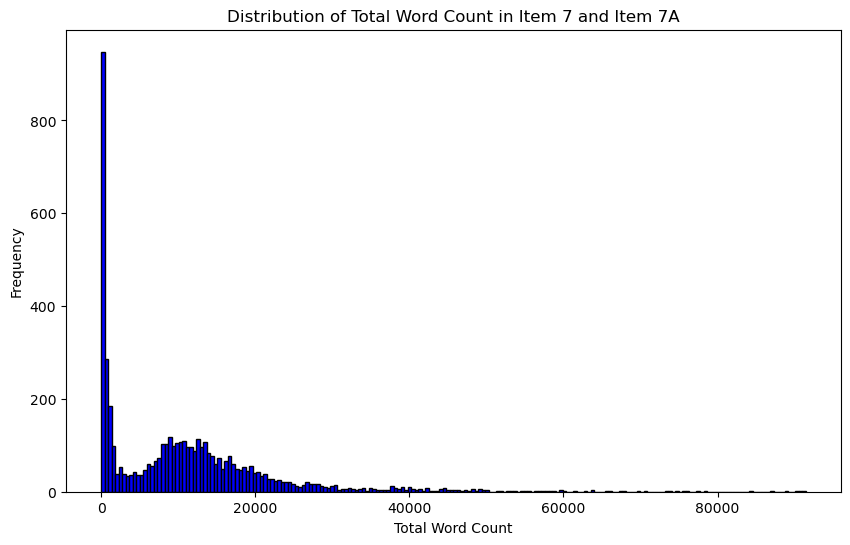

In [32]:
# Further filter out the samples without enough content. To be able to that, create a column to count the words number of item7 and item 7A
df_10ksp_filtered2=df_10ksp_filtered1.copy()
df_10ksp_filtered2['Item 7 Word Count'] = df_10ksp_filtered2['Item 7 Content'].apply(lambda x: len(x.split()))
df_10ksp_filtered2['Item 7A Word Count'] = df_10ksp_filtered2['Item 7A Content'].apply(lambda x: len(x.split()))
df_10ksp_filtered2['Total Word Count'] = df_10ksp_filtered2['Item 7 Word Count'] + df_10ksp_filtered2['Item 7A Word Count']
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df_10ksp_filtered2['Total Word Count'], bins=200, color='blue', edgecolor='black')
plt.title('Distribution of Total Word Count in Item 7 and Item 7A')
plt.xlabel('Total Word Count')
plt.ylabel('Frequency')
plt.show()

In [33]:
#further trim the samples, only keep MD&A with more than 500 words
df_10ksp_filtered2=df_10ksp_filtered2[df_10ksp_filtered2['Total Word Count']>=500]

<class 'pandas.core.frame.DataFrame'>
Index: 4060 entries, 1 to 5022
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   level_0                     4060 non-null   int64 
 1   index                       4060 non-null   int64 
 2   ACCESSION NUMBER            4060 non-null   object
 3   CONFORMED SUBMISSION TYPE   4060 non-null   object
 4   CONFORMED PERIOD OF REPORT  4060 non-null   object
 5   FILED AS OF DATE            4060 non-null   object
 6   DATE AS OF CHANGE           4060 non-null   object
 7   COMPANY CONFORMED NAME      4060 non-null   object
 8   CENTRAL INDEX KEY           4060 non-null   object
 9   FISCAL YEAR END             4060 non-null   object
 10  Item 7 Content              4060 non-null   object
 11  Item 7A Content             4060 non-null   object
 12  FILE YEAR                   4060 non-null   object
 13  Negative                    4060 non-null   int64 
 1

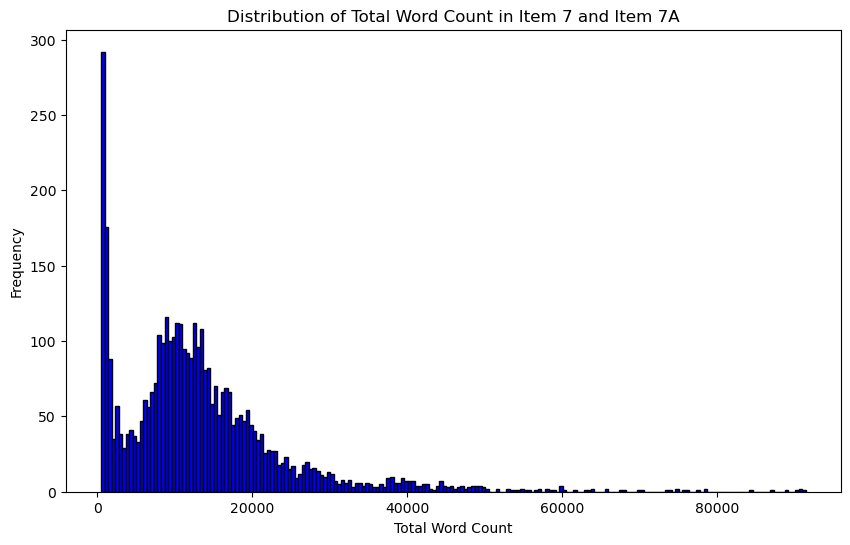

In [34]:
df_10ksp_filtered2.info()
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df_10ksp_filtered2['Total Word Count'], bins=200, color='blue', edgecolor='black')
plt.title('Distribution of Total Word Count in Item 7 and Item 7A')
plt.xlabel('Total Word Count')
plt.ylabel('Frequency')
plt.show()

In [35]:
# Display the distribution of 'Total Word Count' in a table format
print(df_10ksp_filtered2['Total Word Count'].describe())


count     4060.000000
mean     13455.866010
std      11190.938338
min        500.000000
25%       6753.500000
50%      11561.000000
75%      17303.500000
max      91440.000000
Name: Total Word Count, dtype: float64


In [36]:
#Now to create a cleaner version, in which:
#We rule out all the records that contain only one of 7 and 7A. If not, the sample will be naturally biased (given that we examine the sentiment seeing 7 and 7A as a whole)
#Such situations include: (1) 7 and 7A repeating each other (in the error cases from checking the datarame, column item 7 tends to repeat and have only item 7A); (2) either 7 or 7A are missing from the extraction

df_10ksp_filtered3 = df_10ksp_filtered2[~df_10ksp_filtered2['Item 7 Content'].str.startswith("Item 7A")]
df_10ksp_filtered3 = df_10ksp_filtered2[~df_10ksp_filtered2['Item 7 Content'].str.startswith("Item 7A")]
df_10ksp_filtered3 = df_10ksp_filtered2[
    ~(df_10ksp_filtered2['Item 7 Content'].str.contains("Section not found.") |
      df_10ksp_filtered2['Item 7A Content'].str.contains("Section not found."))
]


In [37]:
#trim the result
df_10ksp_filtered3.drop(['level_0', 'index'], axis=1, inplace=True)
df_10ksp_filtered3.head(4)

,ACCESSION NUMBER,CONFORMED SUBMISSION TYPE,CONFORMED PERIOD OF REPORT,FILED AS OF DATE,DATE AS OF CHANGE,COMPANY CONFORMED NAME,CENTRAL INDEX KEY,FISCAL YEAR END,Item 7 Content,Item 7A Content,...,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining,Item 7 Word Count,Item 7A Word Count,Total Word Count
1,0000004904-00-000039,10-K405,19991231,20000324,Not found,AMERICAN ELECTRIC POWER COMPANY INC,0000004904,1231,Item 7. MANAGEMENT'S DISCUSSION AND ANALYSIS O...,Item 7A. QUANTITATIVE AND QUALITATIVE DISCLOSU...,...,3,0,1,14,0,0,14,334,286,620
7,0000037996-00-000019,10-K,19991231,20000316,Not found,FORD MOTOR CO,0000037996,1231,Item 7. Management's Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,...,53,47,81,10,12,11,10,4996,871,5867
9,0000898430-00-003950,10-K,20000930,20001227,Not found,JACOBS ENGINEERING GROUP INC /DE/,0000052988,0930,Item 7. - Management's Discussion and Analysis...,Item 7A. QUALITATEE and QUANTITATEE DISCLOSURE...,...,11,6,20,38,3,5,5,2205,11,2216
10,0000060086-00-000011,10-K405,19991231,20000330,Not found,LOEWS CORP,0000060086,1231,"Item 7, Management's\nDiscussion and Analysis ...",Item 7A. Quantitative And Qualitative Disclosu...,...,728,125,344,759,33,76,67,23753,1507,25260


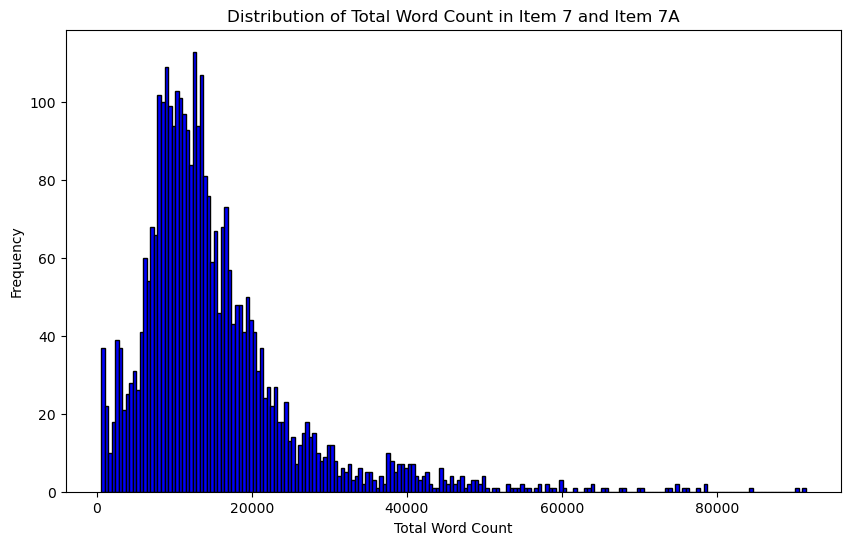

In [38]:
#Now observe the sample word count distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df_10ksp_filtered3['Total Word Count'], bins=200, color='blue', edgecolor='black')
plt.title('Distribution of Total Word Count in Item 7 and Item 7A')
plt.xlabel('Total Word Count')
plt.ylabel('Frequency')
plt.show()

In [39]:
chunk_size = len(df_10ksp_filtered3) // 4
df_bow_1 = df_10ksp_filtered3.iloc[:chunk_size]
df_bow_2 = df_10ksp_filtered3.iloc[chunk_size:2*chunk_size]
df_bow_3 = df_10ksp_filtered3.iloc[2*chunk_size:3*chunk_size]
df_bow_4 = df_10ksp_filtered3.iloc[3*chunk_size:]
df_bow_1.to_csv('df_bow_1.csv', index=False)
df_bow_2.to_csv('df_bow_2.csv', index=False)
df_bow_3.to_csv('df_bow_3.csv', index=False)
df_bow_4.to_csv('df_bow_4.csv', index=False)

In [40]:
# # Load the DataFrames from the provided URLs
# df_bow_1 = pd.read_csv('https://github.com/ethancn01/10ksentimentalanalysis/raw/main/df_bow_1.csv')
# df_bow_2 = pd.read_csv('https://github.com/ethancn01/10ksentimentalanalysis/raw/main/df_bow_2.csv')
# df_bow_3 = pd.read_csv('https://github.com/ethancn01/10ksentimentalanalysis/raw/main/df_bow_3.csv')
# df_bow_4 = pd.read_csv('https://github.com/ethancn01/10ksentimentalanalysis/raw/main/df_bow_4.csv')

In [66]:
# df_10ksp_filtered3.to_csv('df10ksp0220.csv')

### End of the data preparation of Bag of Words: df_10ksp_filtered3
#### Now, we establish set of samples that contain the count of total words as well as those in each category of sentiment dictionary
#### for sake of convenience, the outcome will be downloaded and saved in the github directory in 4 files 
#### Data for Bag of Words saved as df_bow_1 , df_bow_2, df_bow_3, df_bow_4 (split because of the limitation of github), download them using above code or manually

### B.TF-IDF method

In [41]:

import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


In [42]:
#Prepare filtered4 for tf-idf
df_10ksp_filtered4 = df_10ksp_filtered3.copy()
df_10ksp_filtered4['combined_text'] = df_10ksp_filtered4['Item 7 Content'] + " " + df_10ksp_filtered4['Item 7A Content']


In [43]:
#Initialize vectorizer
tfidf_vectorizer = TfidfVectorizer()
#convert the text using tf-idf vectorizer to matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df_10ksp_filtered4['combined_text'])
#prepare the dict
dict.set_index('Word', inplace=True)
dict.index = dict.index.str.lower()

In [44]:
import numpy as np

# get feature names of each word in the tf-idf matrix
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

# intialize the sentiment scores
sentiment_scores = np.zeros((tfidf_matrix.shape[0], 7)) 

# iterate each category of sentiment
for i, sentiment in enumerate(['Negative', 'Positive', 'Uncertainty', 'Litigious', 'Strong_Modal', 'Weak_Modal', 'Constraining']):
    # get the sentiment score
    sentiment_index = [dict.loc[word, sentiment] if word in dict.index else 0 for word in feature_names]
    # calculate the sentiment score
    sentiment_scores[:, i] = tfidf_matrix.dot(sentiment_index)

# convert the score to dataframe
sentiment_df = pd.DataFrame(sentiment_scores, columns=['Negative', 'Positive', 'Uncertainty', 'Litigious', 'Strong_Modal', 'Weak_Modal', 'Constraining'])

# add the dataframe back to the original dataframe
df_10ksp_filtered4 = pd.concat([df_10ksp_filtered4.reset_index(drop=True), sentiment_df], axis=1)

In [45]:
df_10ksp_filtered4.head(100).to_csv('filtered4.csv')

In [46]:
df_10ksp_filtered4

,ACCESSION NUMBER,CONFORMED SUBMISSION TYPE,CONFORMED PERIOD OF REPORT,FILED AS OF DATE,DATE AS OF CHANGE,COMPANY CONFORMED NAME,CENTRAL INDEX KEY,FISCAL YEAR END,Item 7 Content,Item 7A Content,...,Item 7A Word Count,Total Word Count,combined_text,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining
0,0000004904-00-000039,10-K405,19991231,20000324,Not found,AMERICAN ELECTRIC POWER COMPANY INC,0000004904,1231,Item 7. MANAGEMENT'S DISCUSSION AND ANALYSIS O...,Item 7A. QUANTITATIVE AND QUALITATIVE DISCLOSU...,...,286,620,Item 7. MANAGEMENT'S DISCUSSION AND ANALYSIS O...,0.077729,0.000000,0.006061,0.164904,0.000000,0.000000,0.089104
1,0000037996-00-000019,10-K,19991231,20000316,Not found,FORD MOTOR CO,0000037996,1231,Item 7. Management's Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,...,871,5867,Item 7. Management's Discussion and Analysis o...,0.198667,0.111373,0.195466,0.036746,0.020203,0.015931,0.029081
2,0000898430-00-003950,10-K,20000930,20001227,Not found,JACOBS ENGINEERING GROUP INC /DE/,0000052988,0930,Item 7. - Management's Discussion and Analysis...,Item 7A. QUALITATEE and QUANTITATEE DISCLOSURE...,...,11,2216,Item 7. - Management's Discussion and Analysis...,0.092394,0.048617,0.130855,0.287587,0.011903,0.017264,0.018340
3,0000060086-00-000011,10-K405,19991231,20000330,Not found,LOEWS CORP,0000060086,1231,"Item 7, Management's\nDiscussion and Analysis ...",Item 7A. Quantitative And Qualitative Disclosu...,...,1507,25260,"Item 7, Management's\nDiscussion and Analysis ...",0.884306,0.097071,0.159576,0.964639,0.011497,0.029582,0.039857
4,0000912057-00-014257,10-K405,19991231,20000329,Not found,NORTHERN STATES POWER CO /MN/,0000072903,1231,Item 7. \n\nNSP\nand Dairyland Power Cooperati...,Item 7A Quantitative and Qualitative Disclosur...,...,20,10178,Item 7. \n\nNSP\nand Dairyland Power Cooperati...,0.158061,0.055096,0.114201,0.143912,0.017351,0.029504,0.059729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,0000950170-23-005559,10-K,20221231,20230301,20230301,Ceridian HCM Holding Inc.,0001725057,1231,Item 7. Management s Discussion and Analysis o...,Item 7A. Quantitative and Qualitat ive Disclos...,...,1036,11016,Item 7. Management s Discussion and Analysis o...,0.125223,0.092980,0.104656,0.076434,0.014253,0.020007,0.057815
3330,0000950170-23-064855,10-K,20230930,20231117,20231117,WestRock Co,0001732845,0930,Item 7. Management s Discussion and Analysis o...,Item 7A.\t QUANTITATIVE AND QUALITAT IVE DISCL...,...,2116,9889,Item 7. Management s Discussion and Analysis o...,0.214773,0.065670,0.227226,0.164213,0.020137,0.063520,0.142748
3331,0001739940-23-000008,10-K,20221231,20230223,20230223,Cigna Group,0001739940,1231,Item 7 of this Form 10-K for additional inform...,Item 7A. QUANTITATIVE AND QUALITATIVE DISCLOSU...,...,31,18765,Item 7 of this Form 10-K for additional inform...,0.501347,0.133076,0.217204,0.249253,0.022050,0.082285,0.113007
3332,0001748790-23-000030,10-K,20230630,20230817,20230817,Amcor plc,0001748790,0630,Item 7. - Management's Discussion and Analysis...,Item 7A. - Quantitative and Qualitative Disclo...,...,920,9112,Item 7. - Management's Discussion and Analysis...,0.357551,0.060308,0.198980,0.125443,0.013755,0.045255,0.128011


### C. FINBERT

In [47]:
#data preparation of FINBERT
df_10ksp_filtered5=df_10ksp_filtered3.copy()


In [48]:
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer
from scipy.special import softmax
import pandas as pd


In [49]:
#load Finbert model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone', num_labels=3)
tokenizer = AutoTokenizer.from_pretrained('yiyanghkust/finbert-tone')


/Applications/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [50]:
#define sentiment scoring function
def sentiment_score_tensors(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    probs = softmax(outputs.logits.detach().numpy())
    sentiment = ['negative', 'neutral', 'positive'][np.argmax(probs)]
    return sentiment, probs.max()


In [51]:
#Combine Item 7 Content and Item 7A Content, and Apply Sentiment Analysis:
df_10ksp_filtered5['combined_content'] = df_10ksp_filtered5['Item 7 Content'] + " " + df_10ksp_filtered5['Item 7A Content']
df_10ksp_filtered5['sentiment'], df_10ksp_filtered5['confidence'] = zip(*df_10ksp_filtered5['combined_content'].apply(sentiment_score_tensors))


In [52]:
df_10ksp_filtered5.describe()

,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining,Item 7 Word Count,Item 7A Word Count,Total Word Count,confidence
count,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000,3334.000000
mean,180.843731,92.545891,199.918716,89.835033,28.463107,66.527295,85.933713,12039.913017,3071.109478,15111.022496,0.970592
std,167.136844,65.493539,147.347506,102.949781,22.127830,75.684014,69.037231,7640.290164,7861.995484,10390.195800,0.085902
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,541.000000,0.428880
25%,81.000000,51.000000,110.000000,33.000000,14.000000,28.000000,45.000000,7393.500000,235.000000,8959.500000,0.996602
50%,129.000000,79.000000,160.000000,59.000000,23.000000,44.000000,67.000000,11032.000000,641.500000,12759.500000,0.999893
75%,220.000000,116.000000,240.750000,109.000000,36.000000,71.000000,106.000000,15542.750000,1275.750000,18310.000000,0.999991
max,1428.000000,570.000000,1232.000000,1201.000000,214.000000,812.000000,700.000000,78286.000000,70473.000000,91440.000000,1.000000


In [55]:
df_10ksp_filtered5.drop(columns=['Negative', 'Positive', 'Uncertainty', 'Litigious', 'Strong_Modal', 'Weak_Modal', 'Constraining'], inplace=True)
df_10ksp_filtered5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3334 entries, 1 to 5021
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ACCESSION NUMBER            3334 non-null   object 
 1   CONFORMED SUBMISSION TYPE   3334 non-null   object 
 2   CONFORMED PERIOD OF REPORT  3334 non-null   object 
 3   FILED AS OF DATE            3334 non-null   object 
 4   DATE AS OF CHANGE           3334 non-null   object 
 5   COMPANY CONFORMED NAME      3334 non-null   object 
 6   CENTRAL INDEX KEY           3334 non-null   object 
 7   FISCAL YEAR END             3334 non-null   object 
 8   Item 7 Content              3334 non-null   object 
 9   Item 7A Content             3334 non-null   object 
 10  FILE YEAR                   3334 non-null   object 
 11  Item 7 Word Count           3334 non-null   int64  
 12  Item 7A Word Count          3334 non-null   int64  
 13  Total Word Count            3334 non-n

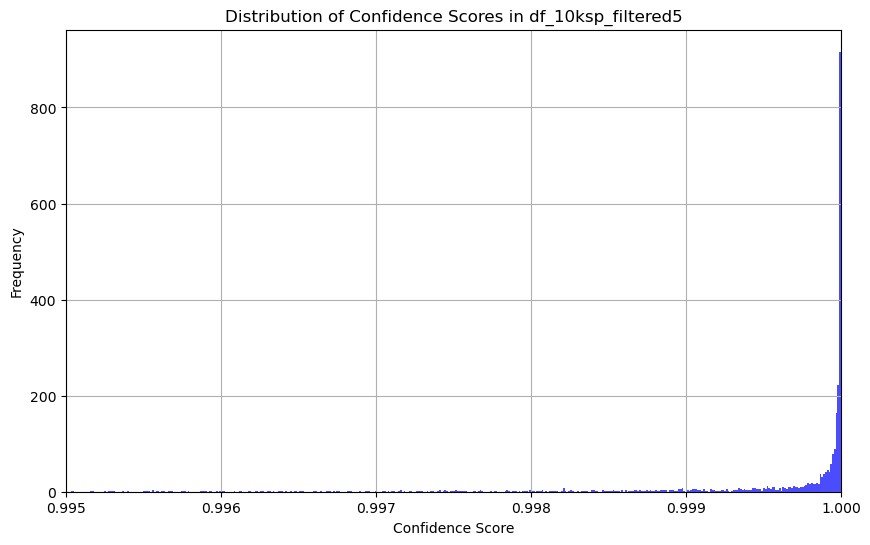

In [62]:
#plot the result and see its distribution
# Assuming df_10ksp_filtered5 is your actual DataFrame and 'confidence' column exists as described
# You can visualize the distribution of 'confidence' using the following code:

plt.figure(figsize=(10, 6))
plt.hist(df_10ksp_filtered5['confidence'], bins=50000, alpha=0.7, color='blue')
plt.title('Distribution of Confidence Scores in df_10ksp_filtered5')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.xlim(0.995, 1.0)
plt.grid(True)
plt.show()


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


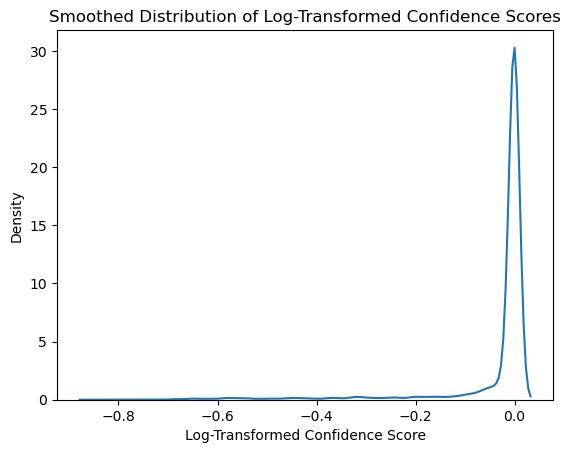

In [63]:
import seaborn as sns

# Assuming you have applied log transformation to your 'confidence' scores
# Now apply Kernel Density Estimation (KDE) to get a smooth distribution
sns.kdeplot(df_10ksp_filtered5['log_confidence'], bw_adjust=0.5)
plt.title('Smoothed Distribution of Log-Transformed Confidence Scores')
plt.xlabel('Log-Transformed Confidence Score')
plt.show()


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


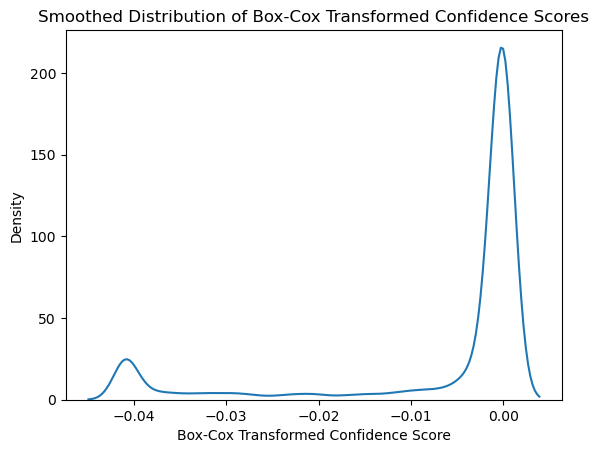

Fitted Lambda: 24.372042807500865


In [64]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# 假设df_10ksp_filtered5已经正确加载，且'confidence'列中没有0值
# 应用Box-Cox变换
confidence_data_transformed, fitted_lambda = stats.boxcox(df_10ksp_filtered5['confidence'])

# 使用seaborn进行可视化
sns.kdeplot(confidence_data_transformed, bw_adjust=0.5)
plt.title('Smoothed Distribution of Box-Cox Transformed Confidence Scores')
plt.xlabel('Box-Cox Transformed Confidence Score')
plt.show()

# 输出用于变换的lambda值
print(f"Fitted Lambda: {fitted_lambda}")
